In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
print(pandas.__version__)

NameError: name 'pandas' is not defined

Import csv data as pandas dataframe

In [10]:
df = pd.read_csv('data/stud.csv')

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

DATA CHECKS

1.check missing values

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

2.check duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
# check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
# check no. of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
# check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
#  exploring data
print(df['gender'].unique())
print(df['race_ethnicity'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']


In [20]:
# define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical features:", numeric_features)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical features:", categorical_features)

Numerical features: ['math_score', 'reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


Adding columns for "Total score" and Average

In [22]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score'] / 3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [23]:
reading_full = df[df['reading_score'] == 100]['average'].count()
print(f"Number of students with full marks: {reading_full}")
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
print(f"Number of students with less than or equal to 20 in reading: {reading_less_20}")

Number of students with full marks: 17
Number of students with less than or equal to 20 in reading: 1


Till now we got analysis of who is best and worst performer

Now lets go for data visualization(exploring data)

visualize average score distribution to make some conclusion

*Histogram
*Kernal distribution function (KDE)

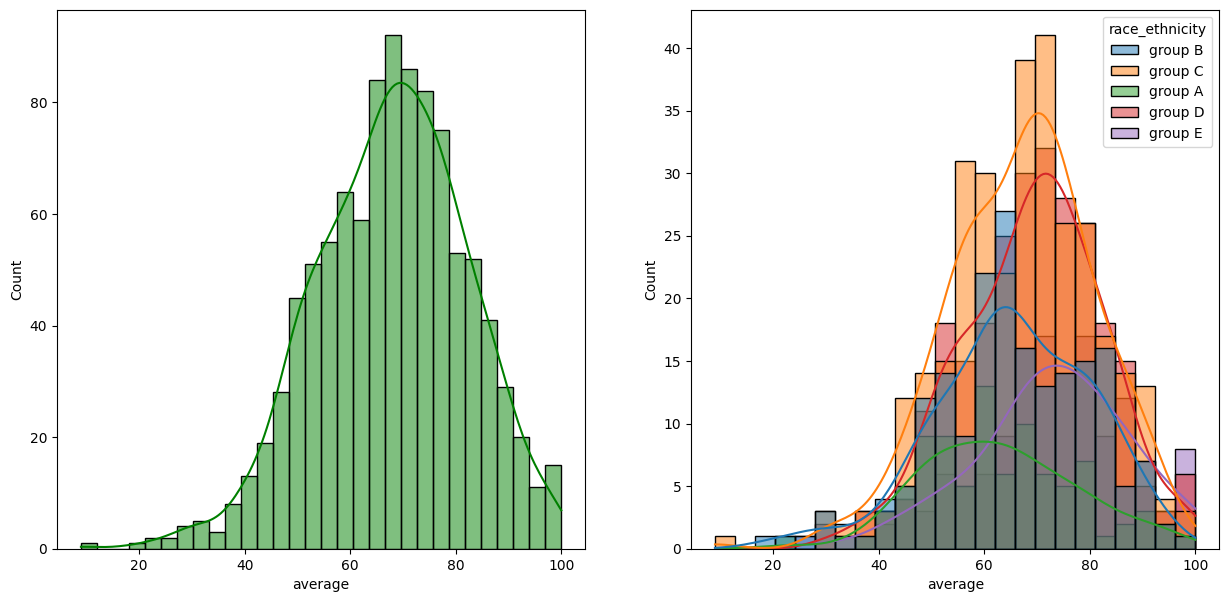

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))
plt.subplot(121)
#plt.subplot(211)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
#plt.subplot(212)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.show()


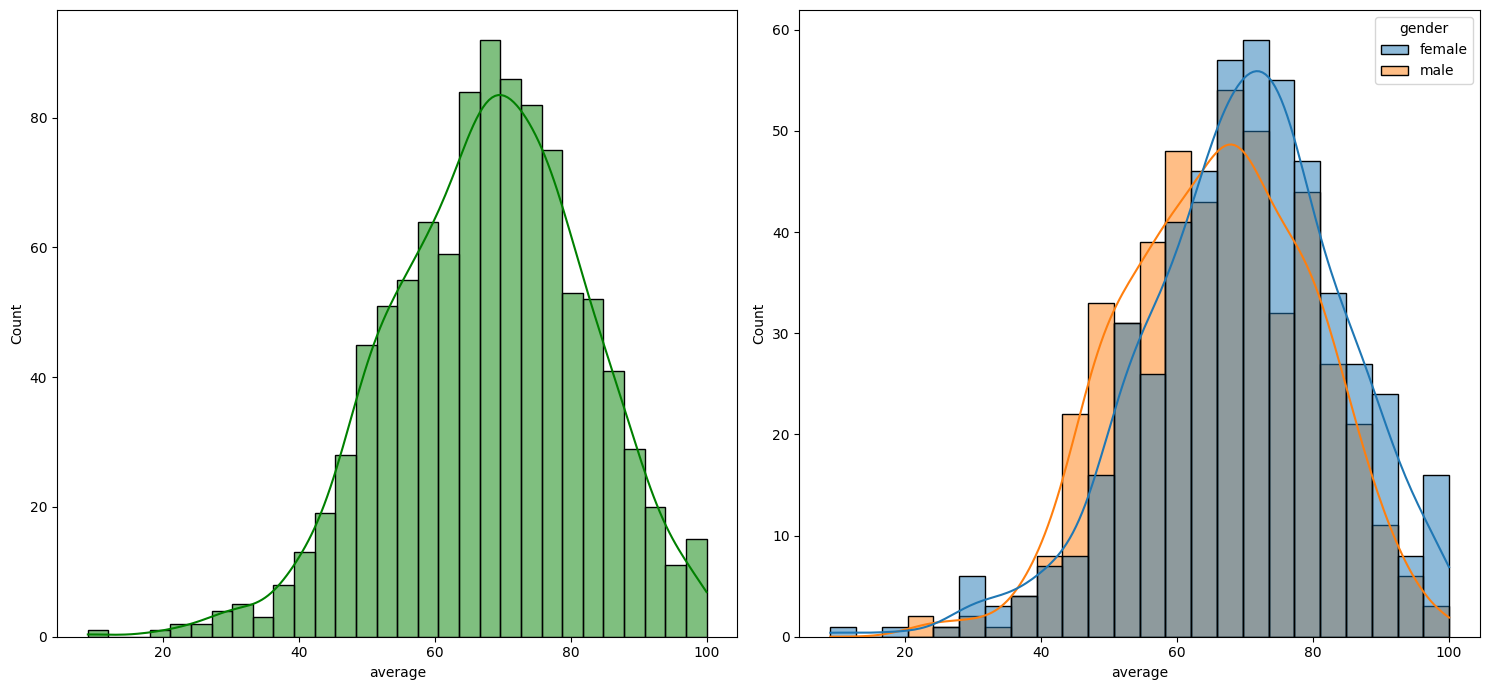

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

plt.tight_layout()
plt.show()
